In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import cvxpy as cp
import gym
import matplotlib.pyplot as plt
from numpy.linalg import LinAlgError
import gurobipy
import seaborn as sns

import sys
sys.path.append('./asebo/')
sys.path.append('./rl/')
from optimizers import Adam
from worker import worker, get_policy
from es import ES

from methods import run_asebo, run_HessianES, run_hessian_asebo,\
                    gradient_antithetic_estimator, gradient_LP_antithetic_estimator, gradient_L2_antithetic_estimator,\
                    invHessian_identity_estimator, invHessian_LP_structured_PTinv_estimator, invHessian_L2_structured_PTinv_estimator


## Training

In [26]:
########### Setting up params ##########
params = {
# 'env_name': 'Swimmer-v2',
# 'env_name': 'HalfCheetah-v2',
# 'env_name': 'InvertedPendulum-v2',
# 'env_name': 'InvertedDoublePendulum-v2',
# 'env_name': 'Reacher-v2',
'env_name': 'Hopper-v2',
'steps':1000,
'h_dim':32,
'start':0,
'max_iter':1000,
'seed':0,
'k':140, # ASEBO only?
'num_sensings':100,
'log':False,
'linear':True,
'threshold':0.995,
'decay':0.99,
'learning_rate':0.05,#0.05
'filename':'',
'policy':'Toeplitz', # Linear or Toeplitz
'shift':0,
'min':10,
'sigma':1e-1,
'backtracking':True,
'alpha': 1e-6,
'beta': 0.25,
'sample_from_invH': False,
'max_ts': 1e7
}



gradient_estimator = gradient_LP_antithetic_estimator
# gradient_estimator = gradient_antithetic_estimator
# gradient_estimator = gradient_L2_antithetic_estimator

invhessian_estimator = invHessian_LP_structured_PTinv_estimator

# invhessian_estimator =  invHessian_identity_estimator
# params['filename'] = "identity"

In [27]:
########### Auto Param Setups ##########
def auto_param_setups(params):
    env = gym.make(params['env_name'])
    params['ob_dim'] = env.observation_space.shape[0]
    params['ac_dim'] = env.action_space.shape[0]
    params['k'] += -1
    # params['alpha'] = 1 # ASEBO only
    params['zeros'] = False
    master = get_policy(params)
    if params['log']:
        params['num_sensings'] = 4 + int(3 * np.log(master.N))
    if params['linear']:
        params['num_sensings'] = int(2 * master.N)
auto_param_setups(params)

## Train

In [28]:
master = get_policy(params)

# params['learning_rate'] = 1
# ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master, False)

params['learning_rate'] = 0.05
ts, rewards, master = run_hessian_asebo(params, master)

# params['learning_rate'] = 0.05
# ts, rewards, master = run_asebo(params, master)

Policy Dimension:  203
Iteration: 1, Alpha: 1, Time Steps: 1.79e+04, Reward: 39.98, Update Direction Norm: 203.00
Iteration: 2, Alpha: 1, Time Steps: 3.69e+04, Reward: 62.44, Update Direction Norm: 203.00
Iteration: 3, Alpha: 1, Time Steps: 7.68e+04, Reward: 248.30, Update Direction Norm: 203.00


KeyboardInterrupt: 

## Run Proper Experiments

In [ ]:
%%time
for env in ['Swimmer-v2','HalfCheetah-v2','InvertedPendulum-v2','InvertedDoublePendulum-v2','Reacher-v2','Hopper-v2']:
    params['env_name'] = env
    auto_param_setups(params)
    for seed in range(10):
        params['seed'] = seed
        master = get_policy(params)
        ts, rewards, master = run_asebo(params, master)
        master = get_policy(params)
        ts, rewards, master = run_hessian_asebo(params, master)
        master = get_policy(params)
        params['learning_rate'] = 1
        ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master, False)

Policy Dimension:  199
Iteration: 1, Alpha: 1, Time Steps: 7.96e+05, Reward: 20.52, Update Direction Norm: 199.00


In [ ]:
params['seed'] = 1
master = get_policy(params)

# params['learning_rate'] = 1
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)

# params['learning_rate'] = 0.05
# ts, rewards, master = run_asebo(params, master)

In [ ]:
params['seed'] = 2


# params['learning_rate'] = 1
master = get_policy(params)
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)


# params['learning_rate'] = 0.05
master = get_policy(params)
ts, rewards, master = run_asebo(params, master)


In [ ]:
params['seed'] = 3

# params['learning_rate'] = 1
master = get_policy(params)
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)

# params['learning_rate'] = 0.05
master = get_policy(params)
ts, rewards, master = run_asebo(params, master)

In [5]:
params['backtracking'] = True

params['seed'] = 2
params['learning_rate'] = 1
master = get_policy(params)
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)


params['seed'] = 3
params['learning_rate'] = 1
master = get_policy(params)
ts, rewards, master = run_HessianES(params, gradient_estimator, invhessian_estimator, master)




Policy Dimension:  116
Academic license - for non-commercial use only - expires 2022-02-06
Using license file /Users/stevenyin/gurobi.lic
Iteration: 1, Leanring Rate: 1.000e+00, Rollouts: 464, Reward: 168.46, Update Direction Norm: 16.11
Iteration: 2, Leanring Rate: 1.000e+00, Rollouts: 928, Reward: 306.40, Update Direction Norm: 18.12
Iteration: 3, Leanring Rate: 2.500e-01, Rollouts: 1392, Reward: 314.80, Update Direction Norm: 12.21
Iteration: 4, Leanring Rate: 1.000e+00, Rollouts: 1856, Reward: 404.48, Update Direction Norm: 9.93
Iteration: 5, Leanring Rate: 2.274e-13, Rollouts: 2320, Reward: 405.11, Update Direction Norm: 9.31
Iteration: 6, Leanring Rate: 2.500e-01, Rollouts: 2784, Reward: 452.39, Update Direction Norm: 11.53
Iteration: 7, Leanring Rate: 9.537e-07, Rollouts: 3248, Reward: 476.92, Update Direction Norm: 15.49
Iteration: 8, Leanring Rate: 9.313e-10, Rollouts: 3712, Reward: 490.16, Update Direction Norm: 16.72
Iteration: 9, Leanring Rate: 6.250e-02, Rollouts: 4176, Re

KeyboardInterrupt: 

## Save and Plot

In [ ]:
# np.save("./data/{}/asebo_params.npy".format(params['dir']), master.params)
# np.save("./data/{}/asebo_ts.npy".format(params['dir']), ts)
# np.save("./data/{}/asebo_rs.npy".format(params['dir']), rewards)


In [41]:
title = "Swimmer-v2"
asebo_df = pd.read_csv("./data/Swimmer-v2Linear_h16_lr0.05_num_sensings125_/Seed0.csv")
hessian_df = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings125__hessianES/Seed0.csv")
# hessian_dfv2 = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings32_v2_hessianES/Seed0.csv")
hessian_dfv2 = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings32_sampleFromInvHFalse_hessianES/Seed2.csv")
hessian_dfv3 = pd.read_csv("./data/Swimmer-v2Linear_h16_lr1_num_sensings32_sampleFromInvHFalse_hessianES/Seed1.csv")



# title = "InvertedPendulum-v2"
# asebo_df = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings25__asebo/Seed0.csv")
# hessian_df = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings25__hessianES/Seed0.csv")
# hessian_dfv2 = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings8_v2_hessianES/Seed0.csv")
# hessian_dfv3 = pd.read_csv("./data/InvertedPendulum-v2Linear_h16_lr1_num_sensings8_sampleFromInvHFalse_hessianES/Seed0.csv")


title = "Hopper-v2"
# asebo_df = pd.read_csv("./data/Hopper-v2Linear_h16_lr0.05_num_sensings66__asebo/Seed0.csv")
# asebo_df = pd.read_csv("./data/Hopper-v2Linear_h16_lr0.05_num_sensings66_sampleFromInvHFalse_asebo/Seed3.csv")
# hessian_df = pd.read_csv("./data/Hopper-v2Linear_h16_lr1_num_sensings66__hessianES/Seed0.csv")
hessian_dfv2 = pd.read_csv("./data/Hopper-v2Toeplitz_h16_lr1_num_sensings214_sigma_0.1_normalizeTrue_hessianES/Seed0.csv")
hessian_dfv3 = pd.read_csv("./data/Hopper-v2Toeplitz_h16_lr1_num_sensings214_sigma_0.1_normalizeFalse_hessianES/Seed0.csv")


# title = "Reacher-v2"
# asebo_df = pd.read_csv("./data/Reacher-v2Linear_h16_lr0.05_num_sensings44__asebo/Seed0.csv")
# hessian_df = pd.read_csv("./data/Reacher-v2Linear_h16_lr1_num_sensings44__hessianES/Seed0.csv")
# hessian_dfv2 = pd.read_csv("./data/Reacher-v2Linear_h16_lr1_num_sensings44_sampleFromInvHFalse_hessianES/Seed2.csv")
# hessian_dfv3 = None


# title = "HalfCheetah-v2"
# asebo_df = pd.read_csv("./data/HalfCheetah-v2Linear_h16_lr0.05_num_sensings204__asebo/Seed0.csv")
# asebo_df2 = pd.read_csv("./data/HalfCheetah-v2Toeplitz_h16_lr0.05_num_sensings232_sampleFromInvHFalse_asebo/Seed1.csv")
# hessian_df = pd.read_csv("./data/HalfCheetah-v2Linear_h16_lr1_num_sensings204__hessianES/Seed0.csv")
# hessian_dfv2 = pd.read_csv("./data/HalfCheetah-v2Linear_h16_lr1_num_sensings204_v2_hessianES/Seed0.csv")
# hessian_dfv3 = pd.read_csv("./data/HalfCheetah-v2Toeplitz_h16_lr1_num_sensings232_sampleFromInvHFalse_hessianES/Seed1.csv")




# title = "InvertedDoublePendulum-v2"
# asebo_df = pd.read_csv("./data/InvertedDoublePendulum-v2Linear_h16_lr0.05_num_sensings22__asebo/Seed0.csv")
# hessian_df = pd.read_csv("./data/InvertedDoublePendulum-v2Linear_h16_lr1_num_sensings22__hessianES/Seed0.csv")


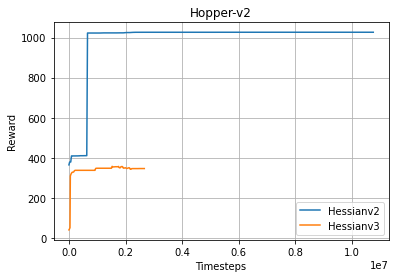

In [42]:
# plt.plot(asebo_ts, asebo_rewards, label="ASEBO")
# plt.plot(lpgrad_ts, lpgrad_rewards, label="LP gradient")

# sns.lineplot(data=asebo_df, x="Timesteps", y="Reward", label="ASEBO")
# sns.lineplot(data=asebo_df2, x="Timesteps", y="Reward", label="ASEBO2")
# sns.lineplot(data=hessian_df, x="Timesteps", y="Reward", label="Hessian")
sns.lineplot(data=hessian_dfv2, x="Timesteps", y="Reward", label="Hessianv2")
sns.lineplot(data=hessian_dfv3, x="Timesteps", y="Reward", label="Hessianv3")

plt.grid()
plt.title(title)
# plt.xlim(0, 1e7)
plt.savefig("./plots/%s.png" % title)


# Testing

In [ ]:
master = get_policy(params)
master.params=np.load("./data/Hopper-v2Linear_h16_lr0.05_num_sensings66_sampleFromInvHFalse_asebo/asebo_params.npy")
test_policy = worker(params, master, np.zeros([1, master.N]), 0)


In [ ]:
from gym.wrappers import Monitor
env = Monitor(gym.make(params['env_name']), './video', force=True)
env._max_episode_steps = params['steps']

In [ ]:
def play(env, worker):
    state = env.reset()
    while 1:
        action = worker.policy.evaluate(state)
        action = np.clip(action, worker.env.action_space.low[0], worker.env.action_space.high[0])
        action = action.reshape(len(action), )
        state, reward, done, info = env.step(action)
        env.render()
        if done: 
            break

In [ ]:
play(env, test_policy)